In [1]:
import pandas as pd
from ch2.data import *
from ch2.stoats.calculate.power import *
from ch2.squeal.database import connect

s = session('-v 0')
stats = activity_statistics(s, LATITUDE, LONGITUDE, SPHERICAL_MERCATOR_X, SPHERICAL_MERCATOR_Y, DISTANCE,
                            ELEVATION, SPEED, CADENCE, HEART_RATE, HEADING, 
                            local_time='2018-03-04 07:16:33', activity_group_name='Bike', with_timespan=True)
stats.describe()

,Timespan ID,Distance,Heart Rate,Longitude,Speed,Cadence,Spherical Mercator X,Latitude,Spherical Mercator Y,Elevation
count,2933.000000,2933.000000,2933.000000,2885.000000,2886.000000,2903.000000,2.885000e+03,2885.000000,2.885000e+03,2784.000000
mean,19427.255711,52424.331323,114.568360,-70.806271,5.694779,61.558043,-7.882118e+06,-33.473723,-3.958354e+06,580.671118
std,29.480184,29499.017849,13.942284,0.108272,2.914509,45.063903,1.205278e+04,0.034321,4.580758e+03,149.218650
min,19385.000000,0.000000,65.000000,-70.949936,0.000000,0.000000,-7.898111e+06,-33.549516,-3.968472e+06,401.366177
25%,19399.000000,29534.110000,105.000000,-70.922318,3.154000,0.000000,-7.895036e+06,-33.501597,-3.962073e+06,479.115404
50%,19421.000000,52038.000000,115.000000,-70.826145,6.196000,87.000000,-7.884330e+06,-33.460546,-3.956594e+06,518.720135
75%,19448.000000,79518.980000,125.000000,-70.706109,7.539000,100.000000,-7.870968e+06,-33.448303,-3.954961e+06,617.829422
max,19485.000000,102708.060000,161.000000,-70.607797,13.175000,159.000000,-7.860024e+06,-33.420239,-3.951217e+06,997.497194


In [2]:
freq, linear = linear_resample(stats)
linear.describe()

,Timespan ID,Distance,Heart Rate,Longitude,Speed,Cadence,Spherical Mercator X,Latitude,Spherical Mercator Y,Elevation,Delta Time
count,2697.000000,2697.000000,2697.000000,2679.000000,2679.000000,2691.000000,2.679000e+03,2679.000000,2.679000e+03,2678.000000,2696
mean,19425.132740,51770.638272,118.267936,-70.819452,5.400664,71.123556,-7.883585e+06,-33.473170,-3.958280e+06,597.764081,0 days 00:00:07
std,28.342624,27692.474772,13.434689,0.107112,2.691638,39.491989,1.192361e+04,0.033378,4.455005e+03,164.278207,0 days 00:00:00
min,19385.000000,0.000000,65.500000,-70.949936,0.000000,0.000000,-7.898111e+06,-33.549515,-3.968472e+06,401.371990,0 days 00:00:07
25%,19401.000000,32867.586250,109.333333,-70.924556,2.764714,44.071429,-7.895285e+06,-33.501164,-3.962016e+06,478.149541,0 days 00:00:07
50%,19413.000000,48897.800000,118.909091,-70.841254,6.093000,90.666667,-7.886012e+06,-33.460390,-3.956574e+06,525.976980,0 days 00:00:07
75%,19443.000000,75146.410000,127.615385,-70.734922,7.321833,100.666667,-7.874175e+06,-33.449917,-3.955176e+06,694.699273,0 days 00:00:07
max,19485.000000,102701.668889,161.000000,-70.607807,13.031667,135.000000,-7.860025e+06,-33.420239,-3.951217e+06,997.202487,0 days 00:00:07


In [3]:
correln = [linear[HEART_RATE].corr(linear[HEART_RATE].shift(freq=n * freq)) for n in range(100)]
print(correln)

[1.0, 0.9882369805746639, 0.9624740211067581, 0.9295073342196881, 0.8944938762894409, 0.8607112186089085, 0.8295563049579051, 0.8007846162850649, 0.7755991786191222, 0.7512993142327274, 0.7302612716566351, 0.7119987267486211, 0.6956834779361427, 0.6814631543875757, 0.6679945206858563, 0.6560460126307184, 0.6456591113394226, 0.6343576896136103, 0.6220287617112911, 0.6079544842417064, 0.5966582445878992, 0.5818421204601121, 0.5710618835043347, 0.5626417150340416, 0.5546170131143636, 0.5470192080743008, 0.5399617899789846, 0.5333571776446708, 0.5231562118473201, 0.5124725561181431, 0.5045782220490626, 0.4973759622276454, 0.4870479879098087, 0.4770365481841779, 0.4664527667735173, 0.45620050378301963, 0.44872704257228585, 0.43892718227277716, 0.42950379493860885, 0.4213239976578142, 0.41261369897993677, 0.4078299698941009, 0.40707752534895647, 0.40679188619883566, 0.4074977091160659, 0.407727283326353, 0.40846981330760235, 0.4077367657106802, 0.4054881107852315, 0.40370441920954464, 0.4011

In [4]:
linear = add_differentials(linear)
print(linear[DELTA_TIME].describe())
linear = add_energy_budget(linear, 64+12)
linear = add_loss_estimate(linear)
linear = add_power_estimate(linear)
print(linear.describe())
df = linear

count               2696
mean     0 days 00:00:07
std      0 days 00:00:00
min      0 days 00:00:07
25%      0 days 00:00:07
50%      0 days 00:00:07
75%      0 days 00:00:07
max      0 days 00:00:07
Name: Delta Time, dtype: object
        Timespan ID       Distance   Heart Rate    Longitude        Speed  \
count   2697.000000    2697.000000  2697.000000  2679.000000  2679.000000   
mean   19425.132740   51770.638272   118.267936   -70.819452     5.400664   
std       28.342624   27692.474772    13.434689     0.107112     2.691638   
min    19385.000000       0.000000    65.500000   -70.949936     0.000000   
25%    19401.000000   32867.586250   109.333333   -70.924556     2.764714   
50%    19413.000000   48897.800000   118.909091   -70.841254     6.093000   
75%    19443.000000   75146.410000   127.615385   -70.734922     7.321833   
max    19485.000000  102701.668889   161.000000   -70.607807    13.031667   

           Cadence  Spherical Mercator X     Latitude  Spherical Mercator 

/home/andrew/project/ch2/choochoo/env/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
import scipy as sp
# freq, shift = measure_initial_shift(df)
# xy = df[HEART_RATE].to_frame().join(df[POWER].shift(freq=shift*freq).to_frame(), how='inner')
# xy.describe()
# fit = sp.stats.linregress(x=df[POWER], y=df[HEART_RATE])
# print(fit)

freq, shift = measure_initial_delay(df)
hr_smoothed = df[HEART_RATE].rolling(10, center=True).median().dropna()
h0, h1 = hr_smoothed.iloc[0], hr_smoothed.iloc[-1]
e0, e1 = df[ENERGY].iloc[0], df[ENERGY].iloc[-1]
adaption = (h1 - h0) / (e1 - e0)
xy = (df[HEART_RATE] - adaption * df[ENERGY]).rename(COR_HEART_RATE).to_frame().join(
    df[POWER].shift(freq=shift*freq).to_frame(),
    how='inner')
fit = sp.stats.linregress(x=xy[POWER], y=xy[COR_HEART_RATE])
print(fit)

LinregressResult(slope=0.0928105839805159, intercept=85.83448837419229, rvalue=0.4944048801360196, pvalue=2.283761981727393e-152, stderr=0.0032852298251058744)


In [6]:
slope, intercept, adaption, shift = measure_initial_scaling(df)
print(slope, intercept, adaption, shift)

0.0928105839805159 85.83448837419229 2.6577688633994577e-14 4


<IPython.core.display.Javascript object>


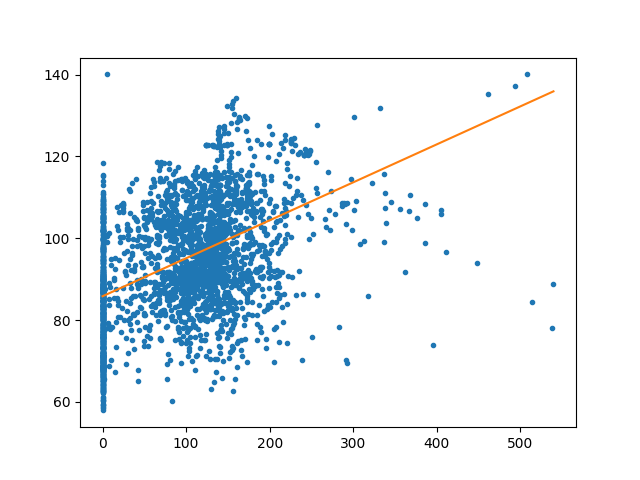

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(df[POWER], df[HEART_RATE] - adaption*df[ENERGY], '.')
xx = np.linspace(start=df[POWER].min(), stop=df[POWER].max(), num=10)
plt.plot(xx, xx * slope + fit.intercept, '-')

<IPython.core.display.Javascript object>


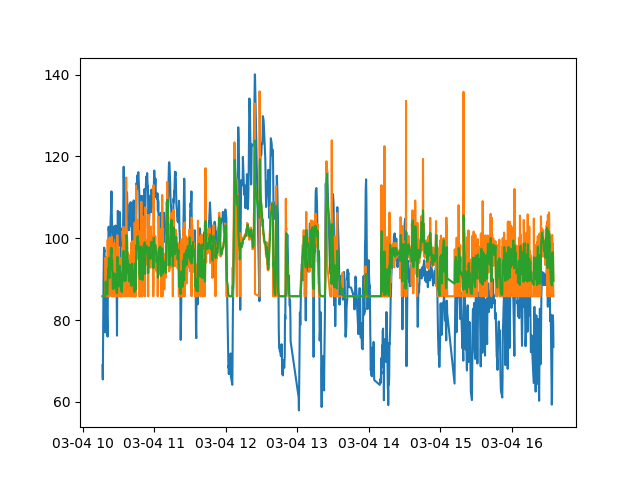

/home/andrew/project/ch2/choochoo/env/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [8]:
def fix(t):
    return pd.to_datetime(t.astype(str))
y = df[POWER] * fit.slope + fit.intercept
plt.figure()
plt.plot(fix(df.index), df[HEART_RATE] - adaption * df[ENERGY], '-')
plt.plot(fix(df.index), y, '-')
plt.plot(fix(df.index), y.ewm(halflife=2).mean())
plt.show()

<IPython.core.display.Javascript object>


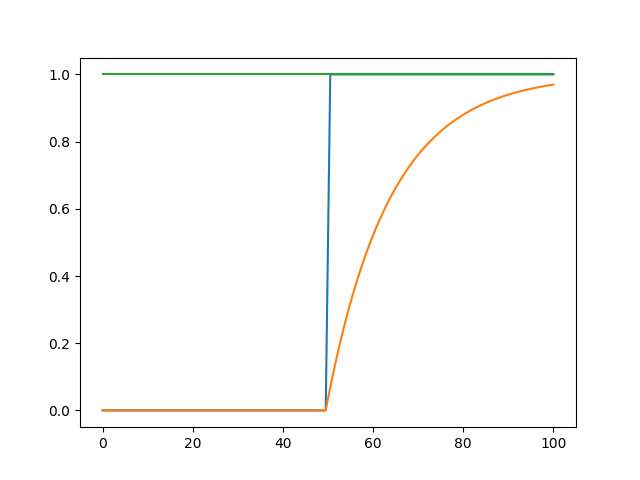

In [9]:
x = np.linspace(0, 100, num=100)
y = pd.Series([0 if xx < 50 else 1 for xx in x])
plt.figure()
plt.plot(x, y, '-')
plt.plot(x, y.ewm(halflife=10).mean())
y.iloc[:] = 1
plt.plot(x, y.ewm(halflife=10).mean())
plt.show()

In [10]:
def chisq(x, data=df):
    slope, intercept, adaption, shift= x
    pred = (df[POWER] * slope + intercept).ewm(halflife=shift).mean()
    obs = df[HEART_RATE] - adaption * df[ENERGY]
    return sp.stats.chisquare(pred, obs).statistic
print(chisq([0.0928105839805159, 85.83448837419229, 2.6577688633994577e-14, 4], df))

4246.974712999941


In [11]:
result = sp.optimize.minimize(chisq, [0.0928105839805159, 85.83448837419229, 2.6577688633994577e-14, 4], 
                              df, method='Nelder-Mead', options={'disp': True})
print(result)

Optimization terminated successfully.
         Current function value: 1660.119256
         Iterations: 141
         Function evaluations: 245
 final_simplex: (array([[1.76569259e-01, 9.00420895e+01, 1.17405502e-14, 6.41671184e+00],
       [1.76568339e-01, 9.00421781e+01, 1.17405319e-14, 6.41669830e+00],
       [1.76569173e-01, 9.00421445e+01, 1.17404997e-14, 6.41678848e+00],
       [1.76569078e-01, 9.00420244e+01, 1.17406147e-14, 6.41673003e+00],
       [1.76569274e-01, 9.00420594e+01, 1.17406119e-14, 6.41676683e+00]]), array([1660.11925623, 1660.11925623, 1660.11925624, 1660.11925625,
       1660.11925626]))
           fun: 1660.1192562289489
       message: 'Optimization terminated successfully.'
          nfev: 245
           nit: 141
        status: 0
       success: True
             x: array([1.76569259e-01, 9.00420895e+01, 1.17405502e-14, 6.41671184e+00])


<IPython.core.display.Javascript object>


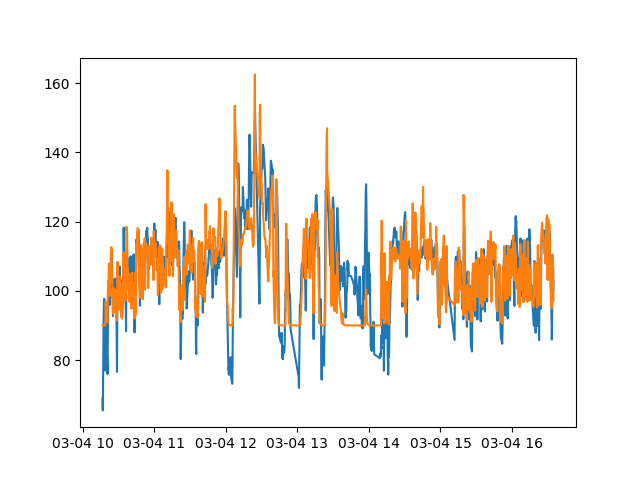

In [12]:
slope, intercept, adaption, shift = result.x
y = df[POWER] * slope + intercept
plt.figure()
plt.plot(fix(df.index), df[HEART_RATE] - adaption * df[ENERGY], '-')
#plt.plot(fix(df.index), y, '-')
plt.plot(fix(df.index), y.ewm(halflife=2).mean())
plt.show()

<IPython.core.display.Javascript object>


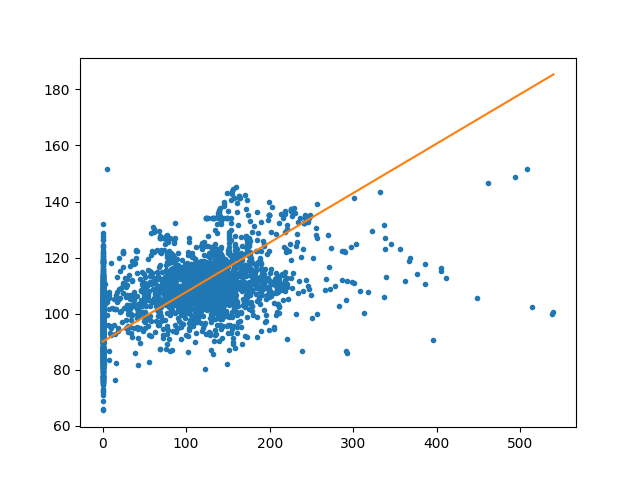

In [13]:
plt.figure()
plt.plot(df[POWER], df[HEART_RATE] - adaption*df[ENERGY], '.')
xx = np.linspace(start=df[POWER].min(), stop=df[POWER].max(), num=10)
plt.plot(xx, xx * slope + intercept, '-')

In [14]:
model = fit_power(df, 'slope', 'intercept', 'adaption', 'delay', 'speed', 'heading', cda=0.44, m=76)
print(model)

/home/andrew/project/ch2/choochoo/env/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Optimization terminated successfully.
         Current function value: 1642.748526
         Iterations: 153
         Function evaluations: 248
Model(cda=0.44, crr=0, slope=0.17837044457036866, intercept=90.18871599608883, adaption=1.1829917292785622e-14, delay=6.391251238117624, m=76, g=9.8, p=1.225, speed=-0.0023399745499044825, heading=0.003739317153885208)


In [15]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [16]:
predicted = df.copy()
predicted[HEART_RATE] = (df[POWER] * model.slope + model.intercept + model.adaption * df[ENERGY]).ewm(halflife=model.delay).mean()
pl = comparison_line_plot(800, 300, DISTANCE, HEART_RATE, source=df, other=predicted)
show(pl)

In [17]:
CORRECTED_HR = 'Corrected Heart Rate'
PREDICTED_HR = 'Predicted Heart Rate'
DELAYED_PWR = 'Delayed Power'
df[DELAYED_PWR] = df[POWER].ewm(halflife=model.delay).mean()
df[CORRECTED_HR] = df[HEART_RATE] - adaption * df[ENERGY]
df[PREDICTED_HR] = (df[POWER] * model.slope + model.intercept).ewm(halflife=model.delay).mean()
# pl = multi_plot(800, 300, POWER, [CORRECTED_HR, PREDICTED_HR], df, ['black', 'grey'], 
#                plotters=[dot_plotter(), dot_plotter()])
pl = multi_dot_plot(800, 300, CORRECTED_HR, [PREDICTED_HR], df, ['black'])
show(pl)